# $ \text{Т.2} $

$$ \text{Случайная величина имеет экспоненциальный закон распределения:} $$

$$ p(x) = \begin{cases}
  e^{-x}, & x \geq 0, \\
  0, &  x < 0
\end{cases} $$

In [160]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from seaborn import boxplot as boxplot

In [161]:
# Размер выборки
N = 25

# Закон распределения
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

# Функция распределения
def F(x: float) -> float:
  return (1 - np.exp(-x)) if x >= 0 else 0

# Обратная к функции распределения
def InverseF(y: float) -> float:
  return -np.log(1 - y)

In [162]:
rng = np.random.default_rng()
random_numbers = rng.random(size=N)

# Выборка
sample = np.array([InverseF(y) for y in random_numbers])

# Вариационный ряд
sort_sample = sorted(sample)

In [163]:
data1 = pd.Series(
    sample,
    list(i+1 for i in range(25))
)

data2 = pd.Series(
    sort_sample,
    list(i+1 for i in range(25))
)

fin_data = pd.DataFrame(
    {
        "Выборка": data1,
        "Вариационный ряд": data2,
    }
)

fin_data

,Выборка,Вариационный ряд
1,0.094583,0.068390
2,0.068390,0.094583
3,0.353679,0.095501
4,0.789321,0.112712
5,0.095501,0.260757
6,0.443387,0.305235
7,2.058230,0.353679
8,0.422903,0.422903
9,0.260757,0.443387
10,0.112712,0.659377


## $ \text{1) Определить по выборке} \\ \text{ моду,} \\ \text{ медиану,} \\ \text{ размах,} \\ \text{ оценку коэффициента асимметрии.} $

In [164]:
def MuK(k: int, sample: list) -> float:
  return np.sum([(x_i - np.mean(sample))**k for x_i in sample]) / len(sample)

# Мода
mode = sort_sample[max([(sort_sample.count(sort_sample[i]), i) for i in range(len(
    sort_sample))])[-1]] if len(sort_sample) != len(set(sort_sample)) else "[все элементы встречаются по 1 разу]"

# Медиана
median = np.median(sort_sample)

# Размах
range_val = np.ptp(sort_sample)

# Коэф. асимметрии
gamma = MuK(3, sort_sample) / MuK(2, sort_sample) ** 1.5

In [165]:
print(
    f" Мода\n{mode}\n\n",
    f"Медиана\n{median}\n\n",
    f"Размах\n{range_val}\n\n",
    f"Коэф. асимметрии\n{gamma}\n",
)

 Мода
[все элементы встречаются по 1 разу]

 Медиана
0.7046161935514285

 Размах
2.2193169633128607

 Коэф. асимметрии
0.4434914192206992



## $ \text{2) Построить эмпирическую функцию распределения,} \\ \text{ гистограмму и boxplot.} $

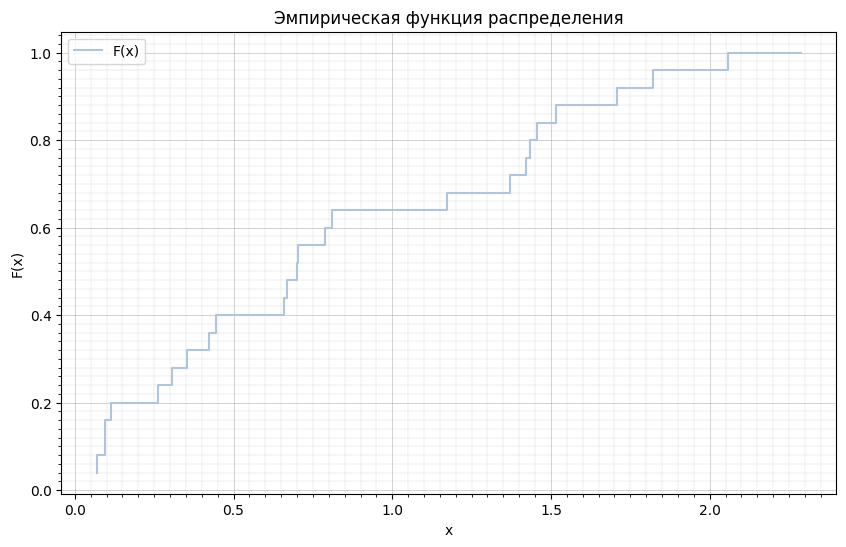

In [166]:
_, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Эмпирическая функция распределения")
axs.set_xlabel("x")
axs.set_ylabel("F(x)")

axs.step(sort_sample,
         np.arange(1, N + 1) / N,
         color="lightsteelblue",
         label="F(x)")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.grid(which='major', linewidth=0.4)

plt.legend()
plt.show()

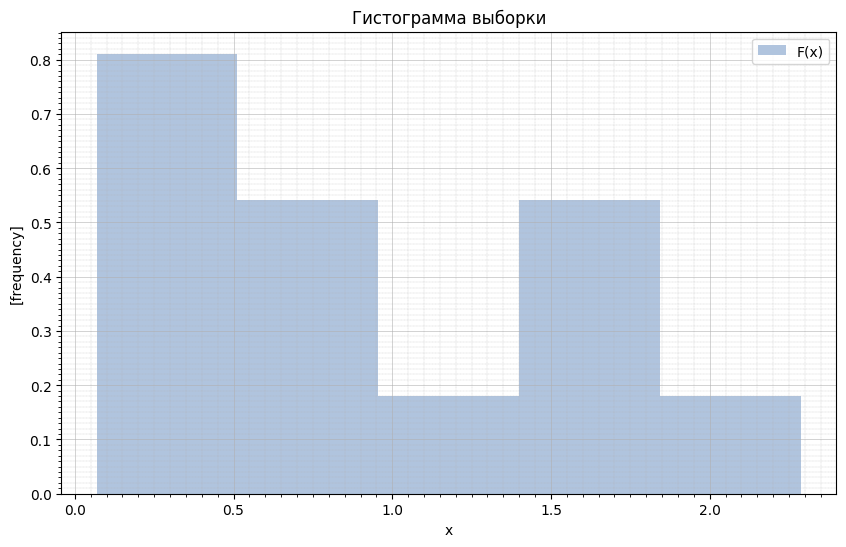

In [167]:
_, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Гистограмма выборки")
axs.set_xlabel("x")
axs.set_ylabel("[frequency]")

axs.hist(sort_sample,
         bins=int(1 + np.log2(N)),
         color='lightsteelblue',
         label="F(x)",
         density=True)

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.grid(which='major', linewidth=0.4)

plt.legend()
plt.show()

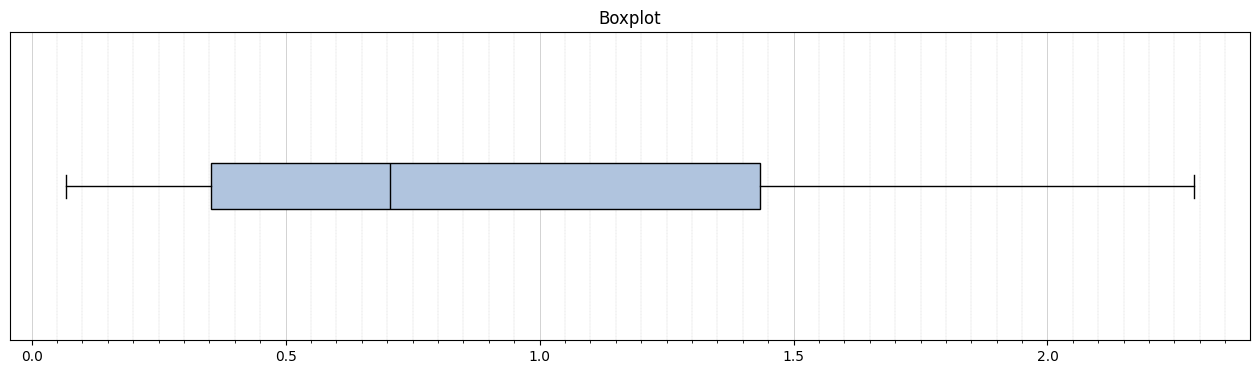

In [168]:
_, axs = plt.subplots(1, 1, figsize=(16, 4))

axs.set_title("Boxplot")

axs.boxplot(x=sort_sample,
            vert=False,
            patch_artist=True,
            boxprops=dict(facecolor="lightsteelblue"),
            medianprops=dict(color="k"),)

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

axs.set_yticks([])

plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.grid(which='major', linewidth=0.4)

plt.show()

## $ \text{3) Сравнить оценку плотности распределения} \\ \text{ ср. арифм. элементов выборки,} \\ \text{ полученную с помощью ЦПТ,} \\ \text{ с bootstrap-оценкой этой плотности.} $

In [169]:
# Количество повторений bootstrap
bootstrap_iteration = 1000

# Параметры нормального распределения
mu = 1
sigma = 1 / 5

In [170]:
bootstrap_samples = sample[np.random.choice(len(sample), size=(bootstrap_iteration, len(sample)))]

# Средние значения для каждой выборки bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

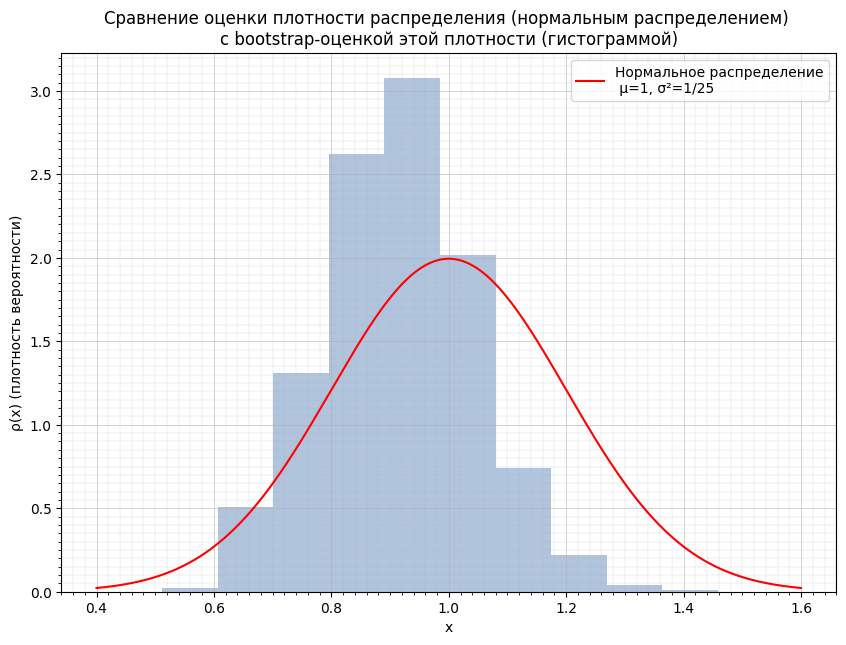

In [171]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))

axs.set_title("Сравнение оценки плотности распределения (нормальным распределением) \nс bootstrap-оценкой этой плотности (гистограммой)")
axs.set_xlabel("x")
axs.set_ylabel("ρ(x) (плотность вероятности)")

axs.hist(bootstrap_means,
         bins=1 + int(np.log2(bootstrap_iteration)),
         color='lightsteelblue',
         density=True)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
axs.plot(x,
         sp.stats.norm.pdf(x, mu, sigma),
         label="Нормальное распределение\n μ=1, σ²=1/25",
         color='red')

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.grid(which='major', linewidth=0.4)

plt.legend()
plt.show()

## $ \text{4) Найти bootstrap-оценку плотности распределения} \\ \text{ коэффициента асимметрии} \\ \text{ и оценить вероятность того,} \\ \text{ что коэффициент асимметрии будет меньше 1.} $

In [172]:
bootstrap_skewness = []

for _ in range(bootstrap_iteration):
  bootstrap_sample = np.random.choice(sample, size=len(sample))
  bootstrap_skewness.append(MuK(3, bootstrap_sample.tolist()) /
                            (MuK(2, bootstrap_sample.tolist()) ** 1.5))

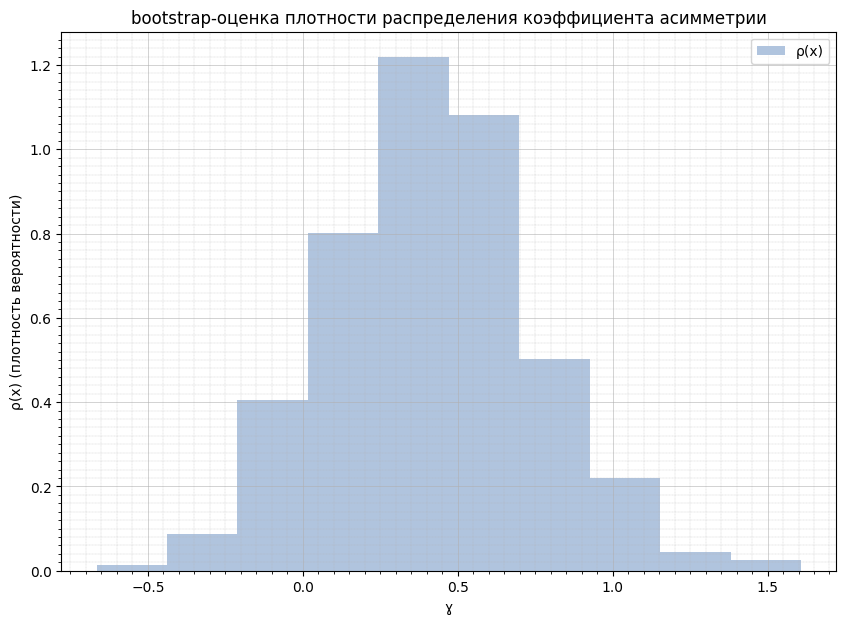

In [173]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))

axs.set_title("bootstrap-оценка плотности распределения коэффициента асимметрии")
axs.set_xlabel("ɣ")
axs.set_ylabel("ρ(x) (плотность вероятности)")

axs.hist(bootstrap_skewness,
         bins=1 + int(np.log2(bootstrap_iteration)),
         color='lightsteelblue',
         label="ρ(x)",
         density=True)

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.grid(which='major', linewidth=0.4)

plt.legend()
plt.show()

In [174]:
prob_skew_less_than_1 = np.sum(
    [1 if bootstrap_skewness[i] < 1 else 0 for i in range(bootstrap_iteration)]) / bootstrap_iteration

print(
    f"Оценка вероятности того, что коэффициент асимметрии будет меньше 1\n{prob_skew_less_than_1}\n\n"
)

Оценка вероятности того, что коэффициент асимметрии будет меньше 1
0.962




## $ \text{5) Сравнить плотность распределения}\\ \text{ медианы выборки} \\ \text{ с bootstrap-оценкой этой плотности.} $

In [175]:
def Kappa(x):
  k = N // 2 + 1
  return N * p(x) * sp.special.comb(N - 1, k - 1) * ((1 - F(x)) ** (N - k)) * (F(x) ** (k - 1))

In [176]:
bootstrap_medians = []

for _ in range(bootstrap_iteration):
  bootstrap_medians.append(np.median(np.random.choice(sample,
                                                      size=len(sample),
                                                      replace=True)))

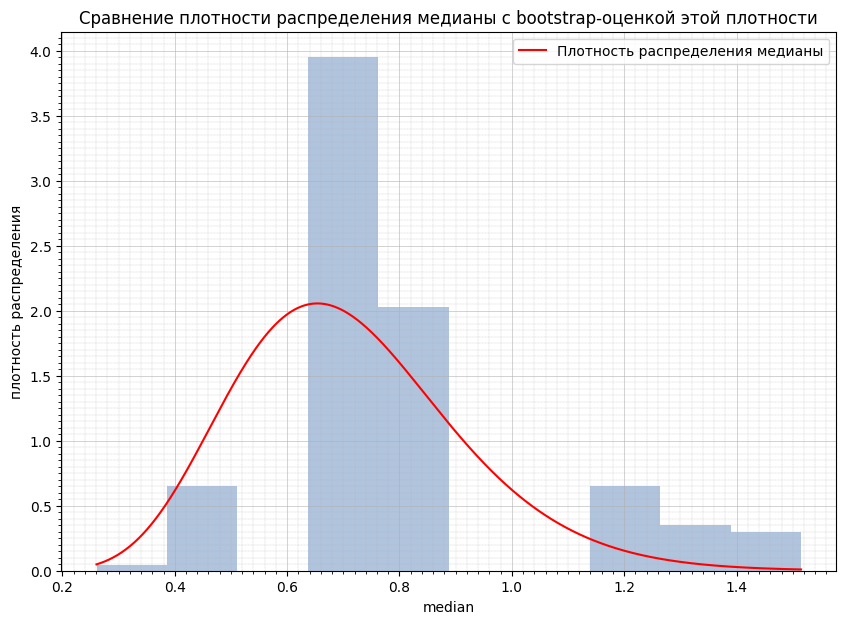

In [177]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))

axs.set_title("Сравнение плотности распределения медианы с bootstrap-оценкой этой плотности")
axs.set_xlabel("median")
axs.set_ylabel("плотность распределения")

axs.hist(bootstrap_medians,
         bins=int(1 + np.log2(bootstrap_iteration)),
         color="lightsteelblue",
         density=True)

x = np.linspace(min(bootstrap_medians),
                max(bootstrap_medians),
                bootstrap_iteration)
axs.plot(x,
         [Kappa(x_i) for x_i in x],
         label="Плотность распределения медианы",
         color="red")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(which='minor', linestyle='--', linewidth=0.2)
plt.grid(which='major', linewidth=0.4)

plt.legend()
plt.show()